In [ ]:
# class imbalance >> which one class has higher percentage

In [1]:
import pandas as pd
import numpy as np

np.random.seed(1) 

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = 100

In [2]:
no_class_0 , no_class_1

(900, 100)

In [3]:
class_0 = {'feature1':np.random.normal(0,1, no_class_0), 
           'feature2':np.random.normal(0,1, no_class_0),
           'target':[0]*no_class_0}
class_0

{'feature1': array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
         8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
         3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
        -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
        -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
        -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
         9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
        -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
        -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
        -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
        -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
         5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
         1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,


In [4]:
class_0 = pd.DataFrame(class_0)
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [6]:
class_1 = pd.DataFrame({'feature1':np.random.normal(3,1, no_class_1), 
           'feature2':np.random.normal(3,1, no_class_1),
           'target':[1]*no_class_1})
class_1

,feature1,feature2,target
0,3.489517,3.482598,1
1,3.238796,1.894568,1
2,2.551888,3.420755,1
3,2.389205,4.616794,1
4,0.970055,2.116229,1
...,...,...,...
95,3.268527,2.291345,1
96,2.844950,2.127498,1
97,5.112622,1.906210,1
98,3.256079,1.465300,1


In [7]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.268527,2.291345,1
996,2.844950,2.127498,1
997,5.112622,1.906210,1
998,3.256079,1.465300,1


In [8]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [9]:
#upsampling 

df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

df_minority, df_majority

(     feature1  feature2  target
 900  3.489517  3.482598       1
 901  3.238796  1.894568       1
 902  2.551888  3.420755       1
 903  2.389205  4.616794       1
 904  0.970055  2.116229       1
 ..        ...       ...     ...
 995  3.268527  2.291345       1
 996  2.844950  2.127498       1
 997  5.112622  1.906210       1
 998  3.256079  1.465300       1
 999  2.793239  2.148738       1
 
 [100 rows x 3 columns],
      feature1  feature2  target
 0    1.624345 -0.446699       0
 1   -0.611756  0.204377       0
 2   -0.528172  0.612233       0
 3   -1.072969  0.744885       0
 4    0.865408 -0.036281       0
 ..        ...       ...     ...
 895  0.578464  0.833679       0
 896 -0.961264  2.160456       0
 897 -1.458324  1.998992       0
 898  0.494342  0.764041       0
 899 -1.494194  1.687255       0
 
 [900 rows x 3 columns])

In [14]:
# replace >> if replace is true , it means data point can be repeated

from sklearn.utils import resample

df_minority_upsampled =  resample(df_minority, replace=True, n_samples= len(df_majority), random_state=1)

df_minority_upsampled

,feature1,feature2,target
937,4.310159,2.675668,1
912,4.496995,2.767397,1
972,3.033929,3.681402,1
909,2.213597,1.955002,1
975,4.054868,3.625218,1
...,...,...,...
936,2.154805,5.208662,1
998,3.256079,1.465300,1
901,3.238796,1.894568,1
932,3.666244,3.919447,1


In [15]:
df_minority_upsampled.shape

(900, 3)

In [17]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
936,2.154805,5.208662,1
998,3.256079,1.465300,1
901,3.238796,1.894568,1
932,3.666244,3.919447,1


In [18]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [19]:
df_minority

,feature1,feature2,target
900,3.489517,3.482598,1
901,3.238796,1.894568,1
902,2.551888,3.420755,1
903,2.389205,4.616794,1
904,0.970055,2.116229,1
...,...,...,...
995,3.268527,2.291345,1
996,2.844950,2.127498,1
997,5.112622,1.906210,1
998,3.256079,1.465300,1


In [21]:
# downsampling

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state= 1)

df_majority, df_majority_downsampled

(     feature1  feature2  target
 0    1.624345 -0.446699       0
 1   -0.611756  0.204377       0
 2   -0.528172  0.612233       0
 3   -1.072969  0.744885       0
 4    0.865408 -0.036281       0
 ..        ...       ...     ...
 895  0.578464  0.833679       0
 896 -0.961264  2.160456       0
 897 -1.458324  1.998992       0
 898  0.494342  0.764041       0
 899 -1.494194  1.687255       0
 
 [900 rows x 3 columns],
      feature1  feature2  target
 860 -0.977773  0.872579       0
 880  0.309817  1.835870       0
 874  0.050317  0.146532       0
 780  0.677808 -0.859827       0
 525  0.713049  0.320971       0
 ..        ...       ...     ...
 494 -1.579156  2.711950       0
 255 -1.044589  0.522655       0
 672  0.410266  0.683356       0
 481 -1.114871 -0.800787       0
 838  0.394428 -0.698571       0
 
 [100 rows x 3 columns])

In [22]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled

,feature1,feature2,target
900,3.489517,3.482598,1
901,3.238796,1.894568,1
902,2.551888,3.420755,1
903,2.389205,4.616794,1
904,0.970055,2.116229,1
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [23]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [25]:
# SMOTE >> Synthetic Minority Oversampling Technique
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90])

X

array([[ 1.26471893,  1.01152664],
       [-1.60006265,  0.53789328],
       [ 1.46628371, -0.25226574],
       ...,
       [-0.83793734,  0.43129889],
       [-1.12281773,  0.9511746 ],
       [-0.90724139,  0.66776276]], shape=(1000, 2))

In [26]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [28]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y , columns=['target'])
final_df = pd.concat([df1, df2], axis = 1)

final_df

,f1,f2,target
0,1.264719,1.011527,1
1,-1.600063,0.537893,0
2,1.466284,-0.252266,1
3,-1.137371,0.043956,0
4,-0.728400,1.204507,0
...,...,...,...
995,-2.338156,0.179850,0
996,-1.405479,0.547622,0
997,-0.837937,0.431299,0
998,-1.122818,0.951175,0


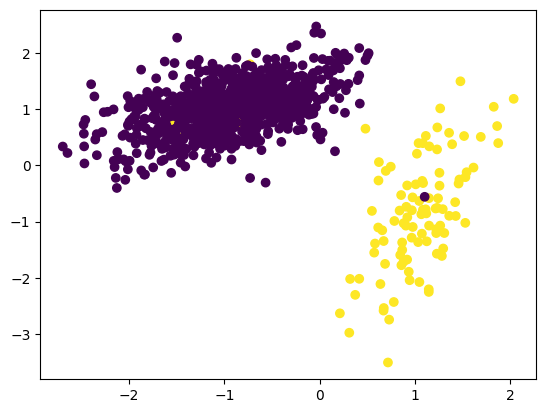

In [29]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])


In [30]:
!pip install imblearn

     ------------------------------------ 235.4/235.4 kB 962.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(final_df[['f1','f2']] , final_df['target'])

In [32]:
X.shape

(1796, 2)

In [33]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y , columns=['target'])
smote_df = pd.concat([df1, df2], axis = 1)

smote_df

,f1,f2,target
0,1.264719,1.011527,1
1,-1.600063,0.537893,0
2,1.466284,-0.252266,1
3,-1.137371,0.043956,0
4,-0.728400,1.204507,0
...,...,...,...
1791,1.046984,-1.231971,1
1792,0.762761,-1.520753,1
1793,1.063239,-0.625168,1
1794,0.876557,-1.699704,1


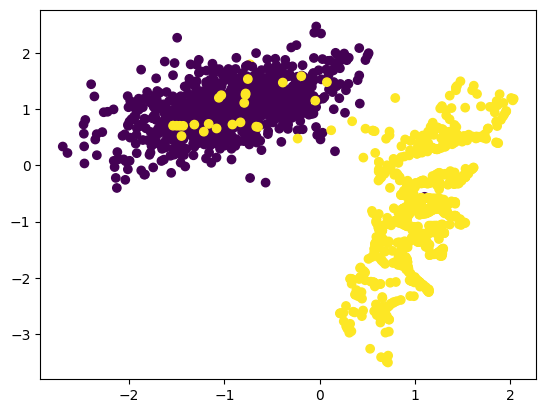

In [35]:
plt.scatter(smote_df['f1'], smote_df['f2'], c=smote_df['target'])